# Fire Detection

## Analyzing Single Image

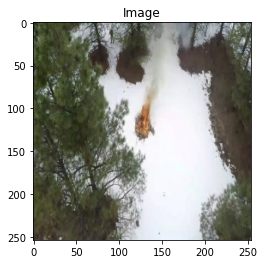

In [154]:
import pandas as pd
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt
%matplotlib inline

img = io.imread("data/Training/Fire/resized_frame14.jpg")
plt.imshow(img)
plt.title("Image")
plt.show()

Plot the pixel histogram following: https://datacarpentry.org/image-processing/05-creating-histograms/ First in grayscale and then in every RGB channel to visualize the intensity and color distribution

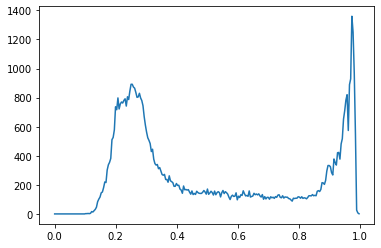

In [155]:
img_grey = color.rgb2gray(img)

histogram, bin_edges = np.histogram(img_grey, bins=256, range=(0, 1))
plt.plot(bin_edges[0:-1], histogram)


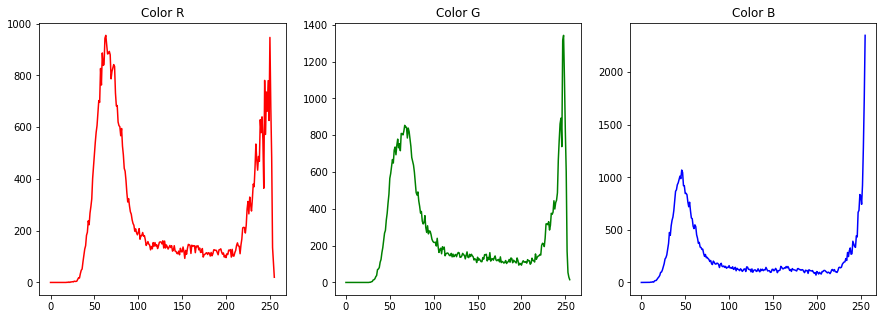

In [156]:
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

fig, axes = plt.subplots(1,3)

for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        img[:, :, channel_id], bins=256, range=(0, 256)
    )
    axes[channel_id].plot(bin_edges[0:-1], histogram, color=c)
    axes[channel_id].title.set_text("Color {}".format(c.upper()))

fig.set_size_inches(15, 5)

## Analyzing the Training data set

First we analyze the Fire label.

In [157]:
train_fire_imgs = []

for i in range(30000): #30000
    try:
        train_fire_imgs.append(io.imread("data/Training/Fire/resized_frame{}.jpg".format(i)))
    except:
        # No image found
        pass


In [158]:
def calculate_average_img(imgs):
    avg_img = np.empty(imgs[0].shape, dtype=int)
    width = imgs[0].shape[0]
    height = imgs[0][0].shape[0]
    channels = imgs[0][0][0].shape[0]

    for i in range(width):
        for j in range(height):
            for c in range(channels):
                sum = 0
                for img in imgs:
                    sum += img[i][j][c]
                avg_img[i][j][c] = sum / len(imgs)
    
    return avg_img

Calculate the average image for the fire label.

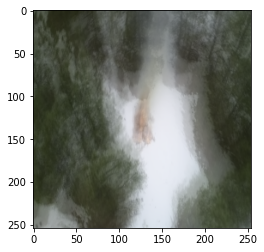

In [159]:
avg_img_fire_train = calculate_average_img(train_fire_imgs)
plt.imshow(avg_img)

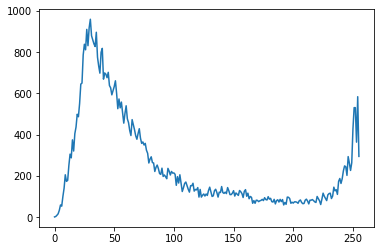

In [160]:
img_grey = color.rgb2gray(avg_img_fire_train)

histogram, bin_edges = np.histogram(img_grey, bins=256)
plt.plot(histogram)

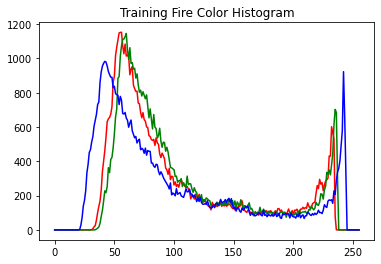

In [161]:
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

for channel_id, c in zip(channel_ids, colors):
    histogram_fire_train, bin_edges = np.histogram(
        avg_img_fire_train[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram_fire_train, color=c)

plt.title("Training Fire Color Histogram")
fig.set_size_inches(15, 5)

Now we can analyze the no fire label.

In [162]:
train_nofire_imgs = []

for i in range(30000): #30000
    try:
        train_nofire_imgs.append(io.imread("data/Training/No_Fire/lake_resized_lake_frame{}.jpg".format(i)))
    except:
        # No image found
        pass

for i in range(30000): #30000
    try:
        train_nofire_imgs.append(io.imread("data/Training/No_Fire/resized_frame{}.jpg".format(i)))
    except:
        # No image found
        pass

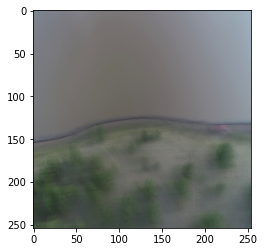

In [163]:
avg_img_nofire_train = calculate_average_img(train_nofire_imgs)
plt.imshow(avg_img_nofire)

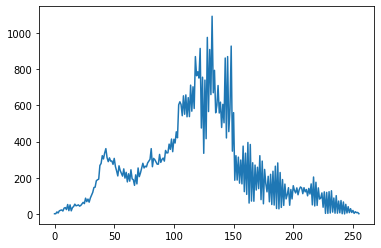

In [164]:
img_grey = color.rgb2gray(avg_img_nofire_train)

histogram, bin_edges = np.histogram(img_grey, bins=256)
plt.plot(histogram)

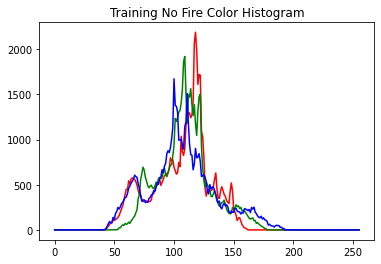

In [165]:
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

for channel_id, c in zip(channel_ids, colors):
    histogram_nofire_train, bin_edges = np.histogram(
        avg_img_nofire_train[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram_nofire_train, color=c)

plt.title("Training No Fire Color Histogram")
fig.set_size_inches(15, 5)

## Analyzing the Test data set

First we analyze the fire label.

In [211]:
test_fire_imgs = []

for i in range(30000): #30000
    try:
        test_fire_imgs.append(io.imread("data/Test/Fire/resized_test_fire_frame{}.jpg".format(i)))
    except:
        # No image found
        pass

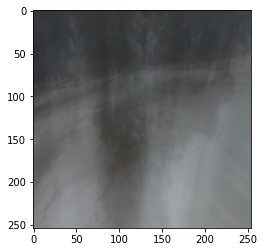

In [212]:
avg_img_fire_test = calculate_average_img(test_fire_imgs)
plt.imshow(avg_img_fire_test)

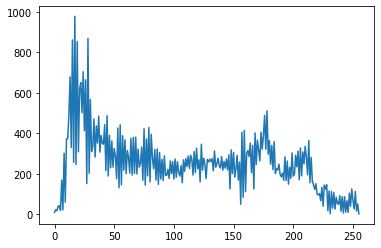

In [213]:
img_grey = color.rgb2gray(avg_img_fire_test)

histogram, bin_edges = np.histogram(img_grey, bins=256)
plt.plot(histogram)

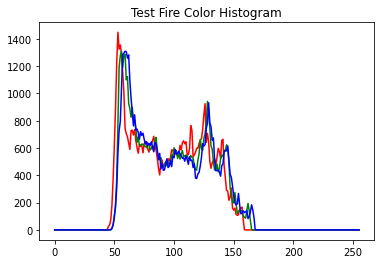

In [214]:
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

for channel_id, c in zip(channel_ids, colors):
    histogram_fire_test, bin_edges = np.histogram(
        avg_img_fire_test[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram_fire_test, color=c)

plt.title("Test Fire Color Histogram")
fig.set_size_inches(15, 5)

Now we analyze te no fire label.

In [215]:
test_nofire_imgs = []

for i in range(30000): #30000
    try:
        test_nofire_imgs.append(io.imread("data/Test/No_Fire/resized_test_nofire_frame{}.jpg".format(i)))
    except:
        # No image found
        pass

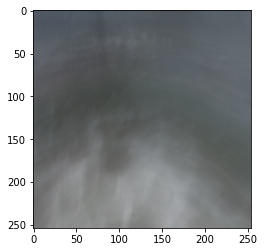

In [216]:
avg_img_nofire_test = calculate_average_img(test_nofire_imgs)
plt.imshow(avg_img_nofire_test)

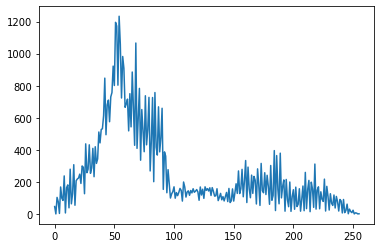

In [217]:
img_grey = color.rgb2gray(avg_img_nofire_test)

histogram, bin_edges = np.histogram(img_grey, bins=256)
plt.plot(histogram)

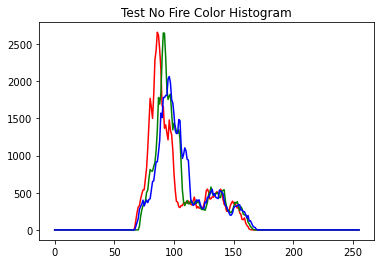

In [218]:
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

for channel_id, c in zip(channel_ids, colors):
    histogram_nofire_test, bin_edges = np.histogram(
        avg_img_nofire_test[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram_nofire_test, color=c)

plt.title("Test No Fire Color Histogram")
fig.set_size_inches(15, 5)

## Summary of Data Exploration

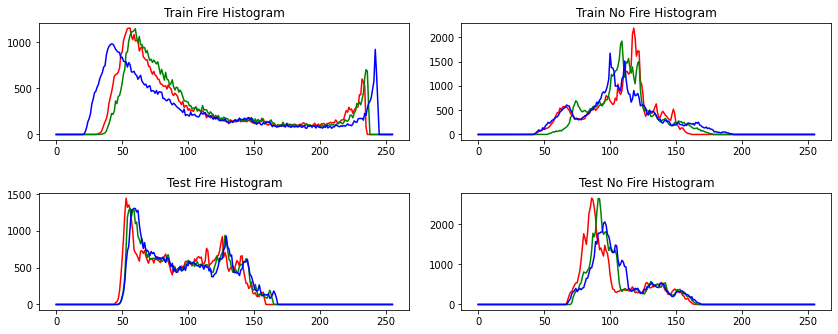

In [219]:
fig, axes = plt.subplots(2,2)
imgs = [
    ("Train Fire Histogram", avg_img_fire_train),
    ("Train No Fire Histogram", avg_img_nofire_train), 
    ("Test Fire Histogram", avg_img_fire_test),
    ("Test No Fire Histogram", avg_img_nofire_test)]

colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

axes = axes.flatten()

for (ax, img) in zip(axes, imgs):
    for channel_id, c in zip(channel_ids, colors):
        hist, bin_edges = np.histogram(
            img[1][:, :, channel_id], bins=256, range=(0, 256)
        )
        ax.plot(bin_edges[0:-1], hist, color=c)
        ax.title.set_text(img[0])

fig.set_size_inches(12, 5)
fig.tight_layout(pad=2.0)

## Transforming Single Image

First we increase the brightness of the picture to expose more the fire pixels.

In [170]:
def enhance_brightness(img, am):
    enhanced = np.copy(img)

    if am < 0:
        return enhanced

    for i in range(len(enhanced)):
        for j in range(len(enhanced[0])):
            for c in range(len(enhanced[0,0])):
                enhanced[i,j,c] = (int(enhanced[i,j,c]) * am) if (int(enhanced[i,j,c]) * am) < 256 else 255
    return enhanced 

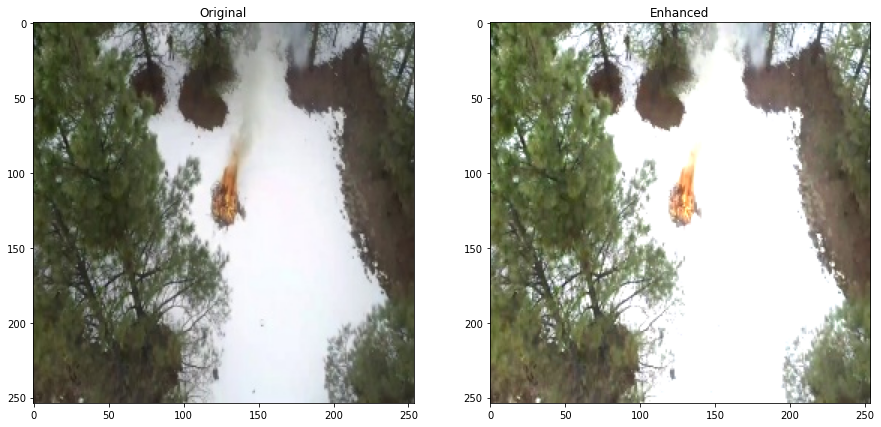

In [171]:
img_enc = enhance_brightness(img, 1.5)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 15)
ax1.imshow(img)
ax1.title.set_text("Original")
ax2.imshow(img_enc)
ax2.title.set_text("Enhanced")

Second we transform the RGB image to CIDELAB.

In [172]:
img_lab = color.rgb2lab(img_enc)

Now we calculate the mean value for each of the channels.

In [173]:
def calculate_mean_channel(img_lab, n):
    channel = img_lab[:,:,n].flatten()
    return np.mean(channel)

In [174]:
l_m = calculate_mean_channel(img_lab, 0)
a_m = calculate_mean_channel(img_lab, 1)
b_m = calculate_mean_channel(img_lab, 2)

print(l_m, a_m, b_m)

67.7571255873677 -3.0359379248785725 7.997509899154957


Now we calculate the R1, R2, R3 and R4 boolean matrices.

In [175]:
def calculate_rx(img_lab, n, m):
    r1 = img_lab[:,:,n] >= m
    return r1 

In [176]:
r1 = calculate_rx(img_lab, 0, l_m) # L >= l_m
r2 = calculate_rx(img_lab, 1, a_m) # A >= a_m
r3 = calculate_rx(img_lab, 2, b_m) # B >= b_m
r4 = calculate_rx(img_lab, 2, img_lab[:,:,1]) # B >= A

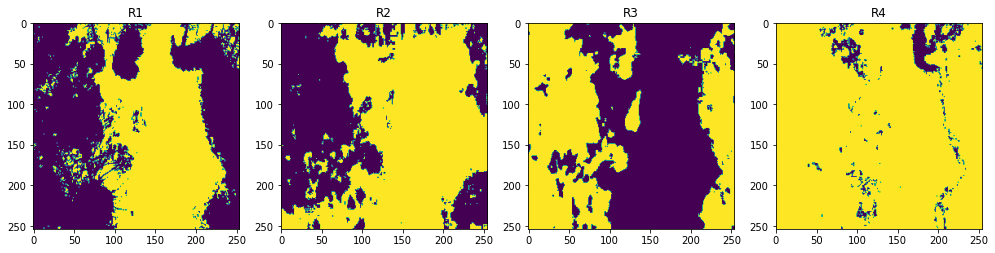

In [177]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_size_inches(17, 17)
ax1.imshow(r1)
ax1.title.set_text("R1")
ax2.imshow(r2)
ax2.title.set_text("R2")
ax3.imshow(r3)
ax3.title.set_text("R3")
ax4.imshow(r4)
ax4.title.set_text("R4")

With the resulting matrices we can calculate the final mask by performing the logical AND operator on all the masks.

In [178]:
r_and = np.logical_and(np.logical_and(np.logical_and(r1, r2), r3), r4)

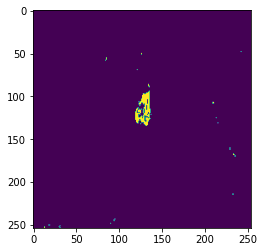

In [179]:
plt.imshow(r_and)

Algorithm to remove small clusters from the mask. Based on BFS, it calculates the size of each cluster of True values. If the size is smaller than a given threshold, it will convert all the cluster values to False, removing the cluster.

In [180]:
import queue

def clean_small(mat, threshold):
    visited = np.full(mat.shape, False)
    to_remove = []
    cleaned_mat = np.copy(mat)
    q = queue.Queue()
    size = 0

    for i in range(len(mat)):
        for j in range(len(mat[0])):
            if not mat[i,j]:
                continue
            # For each True pixel perfom BFS and calculate size of cluster
            size = 0
            to_remove = []
            q.put((i,j))
            while not q.empty():
                size += 1
                x, y = q.get()
                if (x < len(mat) and x >= 0 and y < len(mat[0]) and y >= 0) and not visited[x,y] and mat[x,y]:
                    visited[x,y] = True
                    to_remove.append((x,y))
                    q.put((x+1, y))
                    q.put((x-1, y))
                    q.put((x, y+1))
                    q.put((x, y-1))
            # If size is smaller than predefined threshold, remove nodes in to_remove
            # print("Report: Size: {} i: {}, j {}".format(size, i, j))
            if size < threshold:
                for x, y in to_remove:
                    cleaned_mat[x,y] = False
    return cleaned_mat


Perform cleaning method and and apply final mask to original image.

In [181]:
r_cleaned = clean_small(r_and, 20)

In [182]:
def apply_mask(img, mask):
    masked = np.copy(img)
    for i in range(len(masked)):
        for j in range(len(masked[0])):
            masked[i,j] = masked[i,j] if mask[i,j] else [0,0,0]
    
    return masked


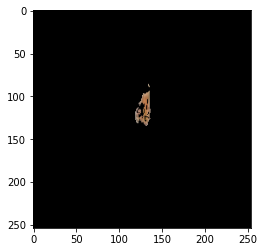

In [183]:
img_masked = apply_mask(img, r_cleaned)
plt.imshow(img_masked)

## Full transformation for an image
Function to perform all steps above in a single step.

In [184]:

def full_transform(img_rgb, enhance, threshold):
    img_enc = enhance_brightness(img_rgb, enhance)
    img_lab = color.rgb2lab(img_enc)
    l_m = calculate_mean_channel(img_lab, 0)
    a_m = calculate_mean_channel(img_lab, 1)
    b_m = calculate_mean_channel(img_lab, 2)

    r1 = calculate_rx(img_lab, 0, l_m)
    r2 = calculate_rx(img_lab, 1, a_m)
    r3 = calculate_rx(img_lab, 2, b_m)
    r4 = calculate_rx(img_lab, 2, img_lab[:,:,1])

    r_and = np.logical_and(np.logical_and(np.logical_and(r1, r2), r3), r4)
    r_cleaned = clean_small(r_and, threshold)

    return apply_mask(img_rgb, r_cleaned)

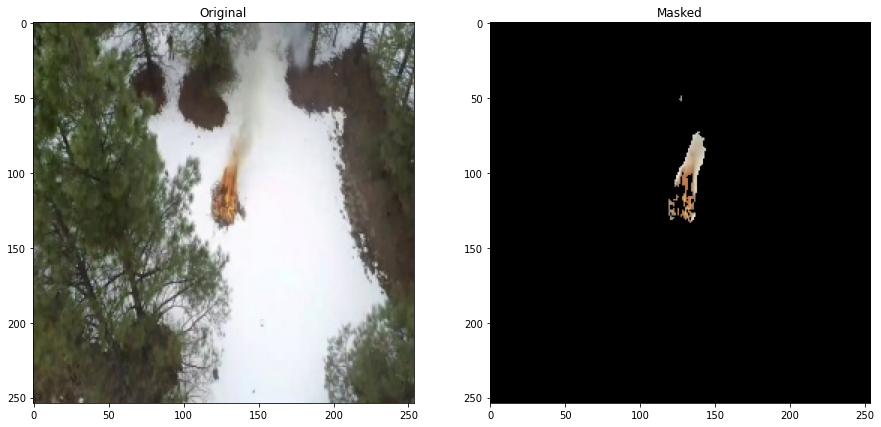

In [185]:
img = io.imread("data/Training/Fire/resized_frame14.jpg")
masked = full_transform(img, enhance=1, threshold=20)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 15)
ax1.imshow(img)
ax1.title.set_text("Original")
ax2.imshow(masked)
ax2.title.set_text("Masked")